In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


In [3]:
df.isnull().sum()
print(df)
# df_cleaned = df.dropna()

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

In [4]:
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


In [5]:
df.drop('New', inplace=True, axis=1) 
df.drop('PendingS', inplace=True, axis=1) 

In [6]:
df.head()
print("Dataset Columns: ",  df.columns)

Dataset Columns:  Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')


In [7]:
# Drop rows with NaN in geographical and sales-related columns
geo_columns = ['ship-city', 'ship-state', 'ship-country', 'Amount']
df = df.dropna(subset=geo_columns)
print(f"\nDataset after dropping NaN values: {df.shape[0]} rows")


Dataset after dropping NaN values: 121143 rows


In [16]:
# Total Sales by City
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)

# Total Sales by State
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

#Total Sales by Country
country_sales = df.groupby('ship-country')['Amount'].sum().sort_values(ascending=False)

print("\nTop 10 Cities by Sales Volume:")
print(city_sales.head(10))

print("\nTop 10 States by Sales Volume:")
print(state_sales.head(10))

print("\nTop Countries by Sales Volume:")
print(country_sales)


Top 10 Cities by Sales Volume:
ship-city
BENGALURU    6845390.65
HYDERABAD    4946394.25
MUMBAI       3701843.04
NEW DELHI    3612512.78
CHENNAI      3103415.74
PUNE         2342011.18
KOLKATA      1413603.87
GURUGRAM     1220562.74
THANE        1004503.29
LUCKNOW       938076.34
Name: Amount, dtype: float64

Top 10 States by Sales Volume:
ship-state
MAHARASHTRA       13340333.05
KARNATAKA         10480694.22
TELANGANA          6915018.08
UTTAR PRADESH      6823947.08
TAMIL NADU         6519182.30
DELHI              4232738.97
KERALA             3823559.58
WEST BENGAL        3507212.82
ANDHRA PRADESH     3217859.86
HARYANA            2880355.99
Name: Amount, dtype: float64

Top Countries by Sales Volume:
ship-country
IN    78570548.25
Name: Amount, dtype: float64


In [17]:
# Identify Untapped Regions (Low Sales)
untapped_cities = city_sales[city_sales < city_sales.mean()]
untapped_states = state_sales[state_sales < state_sales.mean()]

print("\nPotential Growth Areas (Cities with Below Average Sales):")
print(untapped_cities.head(10))

print("\nPotential Growth Areas (States with Below Average Sales):")
print(untapped_states.head(10))


Potential Growth Areas (Cities with Below Average Sales):
ship-city
SANGRUR                9032.00
BHUSAWAL               9030.00
udaipur                9020.00
DHEMAJI                9014.00
NARASAPUR              8986.00
Thane West             8948.00
LALITPUR               8947.29
MAHINDRA WORLD CITY    8947.00
coimbatore             8940.25
Zirakpur               8929.62
Name: Amount, dtype: float64

Potential Growth Areas (States with Below Average Sales):
ship-state
ASSAM               1018654.20
UTTARAKHAND          974425.55
JHARKHAND            920173.21
GOA                  619775.85
CHHATTISGARH         569591.83
HIMACHAL PRADESH     503823.51
JAMMU & KASHMIR      457598.74
MANIPUR              209354.99
CHANDIGARH           203339.05
PUDUCHERRY           189807.24
Name: Amount, dtype: float64


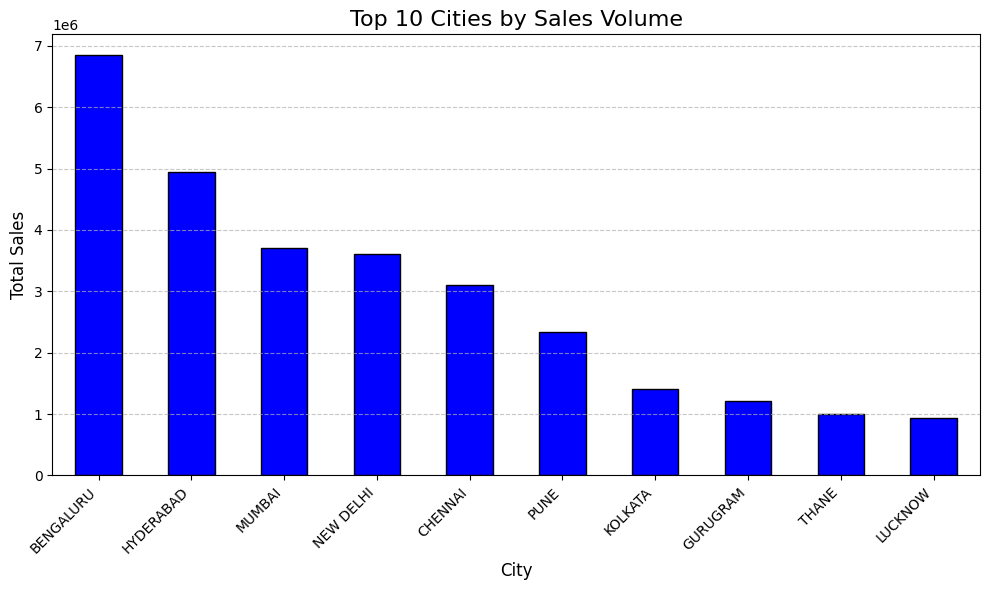

In [18]:
# Bar Graph: Top 10 Cities by Sales
plt.figure(figsize=(10, 6))
city_sales.head(10).plot(kind='bar', color='blue', edgecolor='black')
plt.title("Top 10 Cities by Sales Volume", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

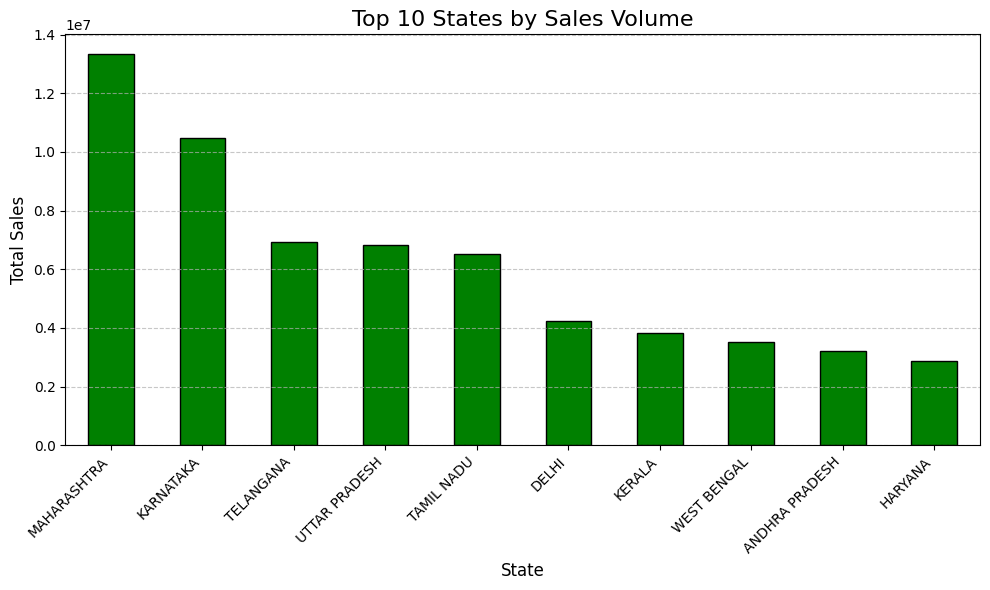

In [19]:
#Bar Graph: Top 10 States by Sales
plt.figure(figsize=(10, 6))
state_sales.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title("Top 10 States by Sales Volume", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

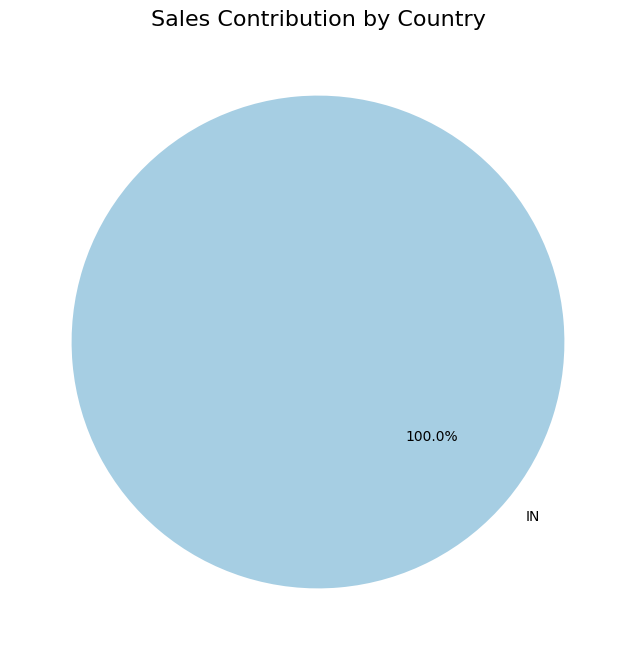

Note-> it is only showing the country wise sales distribution but here we have only Indian Sales data that's why hole pichart  in is looking like same


In [20]:
#Pie Chart: Sales Contribution by Country
plt.figure(figsize=(8, 8))
plt.pie(
    country_sales, 
    labels=country_sales.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Sales Contribution by Country", fontsize=16)
plt.show()
print("Note-> it is only showing the country wise sales distribution but here we have only Indian Sales data that's why hole pichart  in is looking like same")


C:\Users\hp\AppData\Local\Temp\ipykernel_17700\2557112880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=untapped_states.index, y=untapped_states.values, palette='coolwarm')


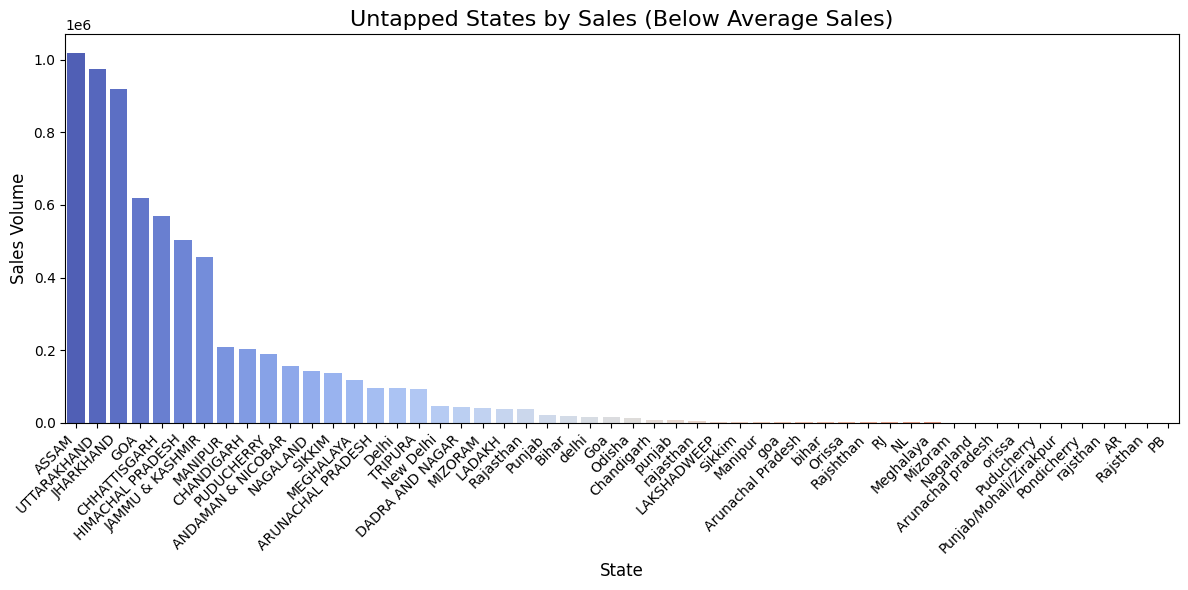

In [21]:
#Heatmap: State vs Sales (Untapped Regions)
plt.figure(figsize=(12, 6))
sns.barplot(x=untapped_states.index, y=untapped_states.values, palette='coolwarm')
plt.title("Untapped States by Sales (Below Average Sales)", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Sales Volume", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()